In [13]:
#import needed library
import numpy as np
import cv2
import os
import random
from matplotlib import pyplot as plt
from skimage.util import random_noise
%matplotlib inline

In [14]:
#for performance metrics
from sewar import full_ref
from skimage import measure, metrics

In [15]:
#show image
def show(img):
    plt.imshow(img, cmap='gray')
    plt.xticks([])
    plt.yticks([])

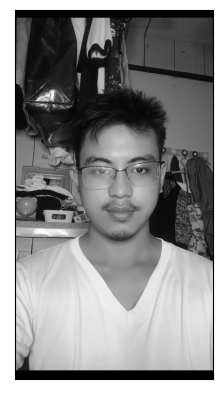

In [16]:
#converting image to grayscale
img_original = cv2.imread('flat2.png', 0)
h, w = img_original.shape
img = np.zeros((h+160,w), np.uint8)
img[80:-80,:] = img_original
cv2.imwrite('orig.jpg', img)
show(img)

In [17]:
#for flat
crop_orig_img = img_original[800:1546, 200:1080]
cv2.imwrite('crop_orig_img.jpg', crop_orig_img)
crop_gray_img = img[1250:2050, 550:1350]
cv2.imwrite('crop_gray_img.jpg', crop_gray_img)

True

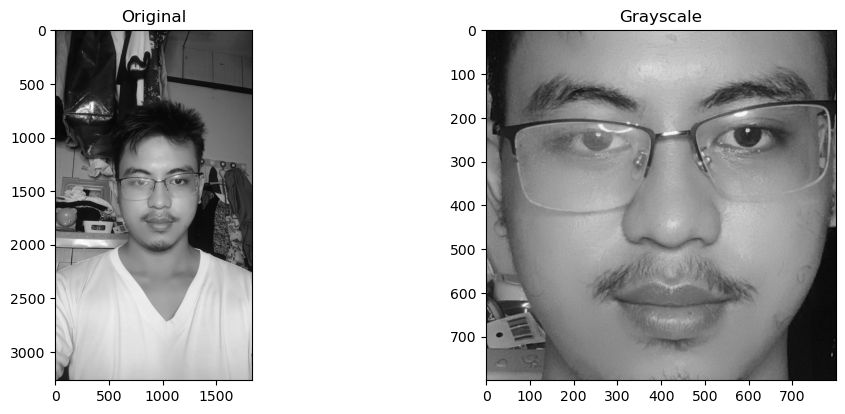

In [18]:
#read the crop image.
gray = cv2.imread('crop_gray_img.jpg',0) #reading the saved imagez

display = [img_original, gray]
label = ['Original', 'Grayscale']
    
fig = plt.figure(figsize=(12,10))
for i in range(len(display)):
    fig.add_subplot(2,2,i+1)
    plt.imshow(display[i], cmap = 'gray')
    plt.title(label[i])
plt.show()

In [19]:
#Gaussian Noise
#You can add more gaussian noise by changing the std (standard deviation) to add more noise to image.
def add_gaussian_noise(image, mean=0, std=20):
    gaus_noise = np.random.normal(mean, std, image.shape)
    image = image.astype("int16")
    noise_img = image + gaus_noise
    return noise_img 

In [20]:
#Mean Filter
def mean_filter (img, k):
    figure_size = 9
    filtered_img = cv2.blur(img, (figure_size, figure_size))
    return filtered_img

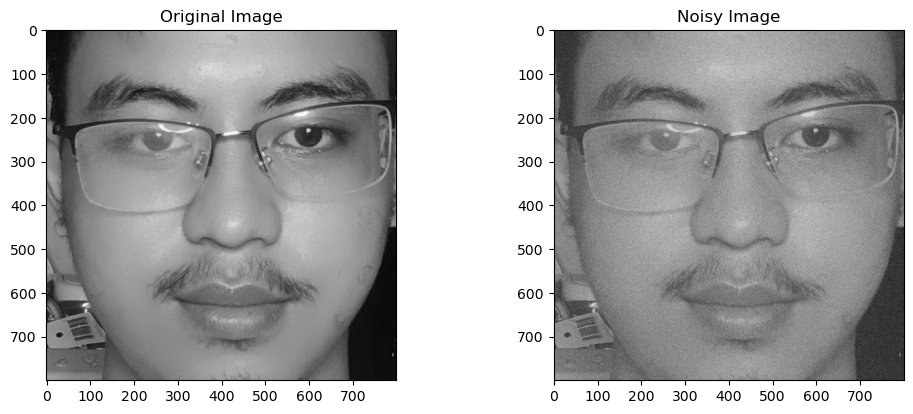

In [21]:
#applying noise to image
noisy_img = add_gaussian_noise(gray)

#display original image and noisy image.
display = [gray, noisy_img]
label = ['Original Image', 'Noisy Image']
fig = plt.figure(figsize=(12,10))
for i in range(len(display)):
    fig.add_subplot(2,2,i+1)
    plt.imshow(display[i], cmap = 'gray')
    plt.title(label[i])
plt.show()

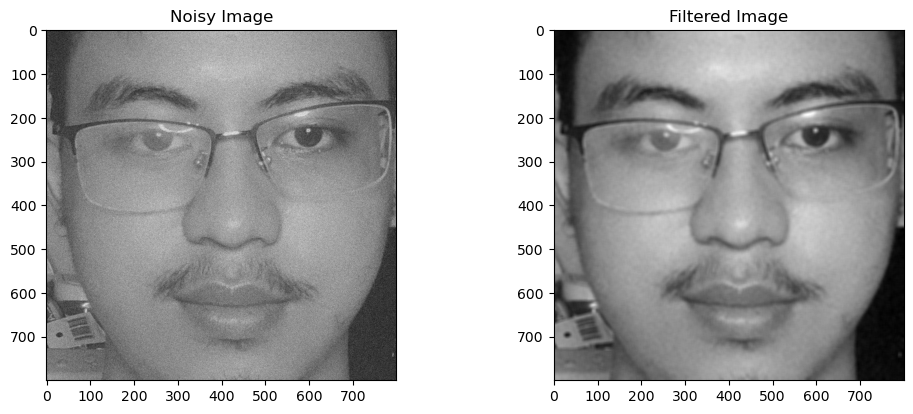

In [23]:
#applying mean filter to noisy image
filtered_img = mean_filter(noisy_img, k=7)

#display original image and noisy image.
display = [noisy_img, filtered_img]
label = ['Noisy Image', 'Filtered Image']
fig = plt.figure(figsize=(12,10))
for i in range(len(display)):
    fig.add_subplot(2,2,i+1)
    plt.imshow(display[i], cmap = 'gray')
    plt.title(label[i])
plt.show()

In [31]:
#comparing noisy image to filtered image
rmse_skimg = metrics.normalized_root_mse(noisy_img, filtered_img)
print("RMSE: based on scikit-image = ", rmse_skimg)
mse_skimg = metrics.mean_squared_error(noisy_img, filtered_img)
print("MSE: based on scikit-image = ", mse_skimg)
psnr_skimg = metrics.peak_signal_noise_ratio(noisy_img, filtered_img, data_range=255)
print("PSNR: based on scikit-image = ", psnr_skimg)
from skimage.metrics import structural_similarity as ssim
ssim_skimg = ssim(noisy_img, filtered_img, data_range = img.max() - img.min(), channel_axis = True)
print("SSIM: based on scikit-image = ", ssim_skimg)

RMSE: based on scikit-image =  0.15333836251857483
MSE: based on scikit-image =  439.88579422989216
PSNR: based on scikit-image =  21.697404238676043
SSIM: based on scikit-image =  0.18929905686895673
